# Init

In [1]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find("project")
# slice the path from the index of 'project' to the end
project_path = path[: index_project + 7]
# set the working directory
os.chdir(project_path + "/src")
print(f"Project path set to: {os.getcwd()}")


Project path set to: c:\Github\new-peak-project\src


In [2]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [3]:
new_path = config["NEW_DATA_PATH"]
print(f'New data path set to: {new_path}')

New data path set to: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project


## Create Toy Models

### Example model

In [4]:
# from models.Specs.ModelSpec2 import ModelSpec2
from models.Specs.ModelSpec4 import ModelSpec4  
from models.Specs.Drug import Drug

model_spec = ModelSpec4()
new_drug = Drug(name='D', start_time=500, default_value=500)
new_drug.add_regulation('R1', 'down')

model_spec.generate_specifications(3, 0)
model_spec.add_drug(new_drug)
model_spec.add_regulation("R1", "R2", "up")
model_spec.add_regulation("R3", "I1_2", "up")
model_spec.add_regulation("I1_1", "I2_2", "up")
model_spec.add_regulation("I1_2", "I2_1", "down")
model_spec.add_regulation("I1_2", "I2_3", "down")
model_spec.add_regulation("I1_3", "I2_2", "up")
model_spec.add_regulation("I2_1", "R1", "down")
model_spec.add_regulation("I2_3", "R3", "up")



In [5]:
build = model_spec.generate_network('test', (200, 1000), (0.1, 10), (0.99, 1.01), 42)

In [6]:
model_str = build.get_antimony_model()

In [7]:
print(model_str)

model test

J0: R1a -> R1; Vmax_J0*R1a/(Km_J0 + R1a)
J1: R1 -> R1a; Kc_J1*R1/(Km_J1 + R1)/(1 + D/Ki0_J1 + I2_1a/Ki1_J1)
J2: R2a -> R2; Vmax_J2*R2a/(Km_J2 + R2a)
J3: R2 -> R2a; (Kc_J3+Kc0_J3*R1a)*R2/(Km_J3 + R2)
J4: R3a -> R3; Vmax_J4*R3a/(Km_J4 + R3a)
J5: R3 -> R3a; (Kc_J5+Kc0_J5*I2_3a)*R3/(Km_J5 + R3)
J6: I1_1a -> I1_1; Vmax_J6*I1_1a/(Km_J6 + I1_1a)
J7: I1_1 -> I1_1a; (Kc0_J7*R1a)*I1_1/(Km_J7 + I1_1)
J8: I1_2a -> I1_2; Vmax_J8*I1_2a/(Km_J8 + I1_2a)
J9: I1_2 -> I1_2a; (Kc0_J9*R2a+Kc1_J9*R3a)*I1_2/(Km_J9 + I1_2)
J10: I1_3a -> I1_3; Vmax_J10*I1_3a/(Km_J10 + I1_3a)
J11: I1_3 -> I1_3a; (Kc0_J11*R3a)*I1_3/(Km_J11 + I1_3)
J12: I2_1a -> I2_1; Vmax_J12*I2_1a/(Km_J12 + I2_1a)
J13: I2_1 -> I2_1a; (Kc0_J13*I1_1a)*I2_1/(Km_J13 + I2_1)/(1 + I1_2a/Ki0_J13)
J14: I2_2a -> I2_2; Vmax_J14*I2_2a/(Km_J14 + I2_2a)
J15: I2_2 -> I2_2a; (Kc0_J15*I1_2a+Kc1_J15*I1_1a+Kc2_J15*I1_3a)*I2_2/(Km_J15 + I2_2)
J16: I2_3a -> I2_3; Vmax_J16*I2_3a/(Km_J16 + I2_3a)
J17: I2_3 -> I2_3a; (Kc0_J17*I1_3a)*I2_3/(Km_J17 + I2_3)/(

In [69]:
from models.Solver.RoadrunnerSolver import RoadrunnerSolver
from models.ModelBuilder import ModelBuilder

new_builder = ModelBuilder("builder")
sbml_model = new_builder.get_sbml_model_from(model_str)
rrs = RoadrunnerSolver()
rrs.compile(sbml_model)
rrs.set_parameter_values({'Kc_J3': 0.01, 'Kc_J5': 0.01})
result = rrs.simulate(0, 1000, 100)


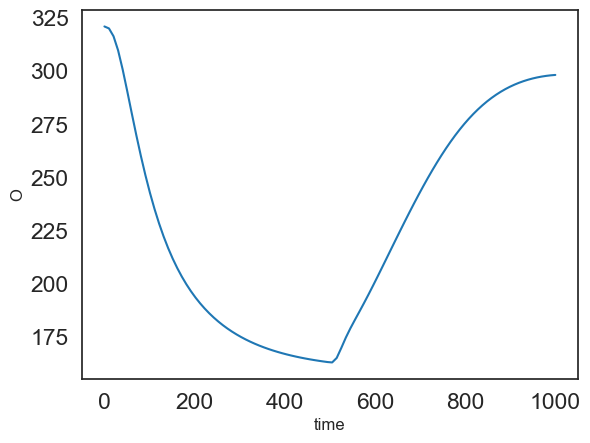

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style (e.g., 'whitegrid', 'darkgrid', 'ticks')
sns.set_style("white")  # Choose your preferred style
sns.color_palette("pastel")

# Configure global font to Arial
plt.rcParams["font.family"] = "sans-serif"  # Use sans-serif fonts
plt.rcParams["font.sans-serif"] = ["Arial"]  # Prioritize Arial
plt.rcParams["axes.titlesize"] = 14  # Optional: enlarge title font
plt.rcParams["axes.labelsize"] = 12  # Optional: enlarge axis labels

ax = sns.lineplot(data=result, legend=False, x='time', y='O')
# ax.set_title('Simulation of O and Oa over Time', fontsize=16)

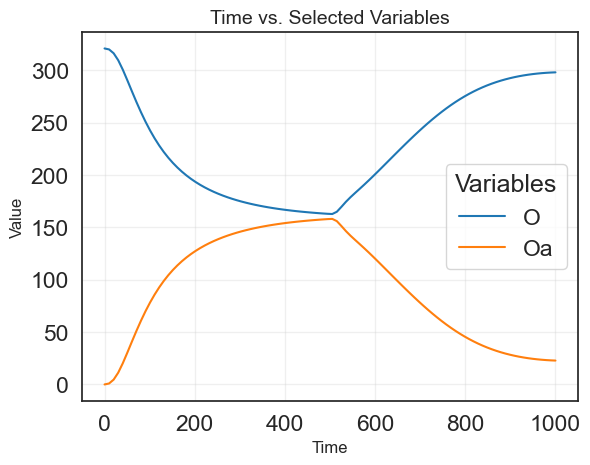

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is named 'df'
# Select the columns you want to plot (replace with your actual column names)
columns_to_plot = ["O", "Oa"]  # Example: R1, R2, and O against time

# Add additional lines
for col in columns_to_plot:
    sns.lineplot(
        data=result,
        x="time",
        y=col,
        label=col,  # Unique label for each line
    )

# Customize plot
# plt.xlim(500, 1000)
plt.title("Time vs. Selected Variables")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(title="Variables")  # Show legend with column names
plt.grid(alpha=0.3)
plt.show()


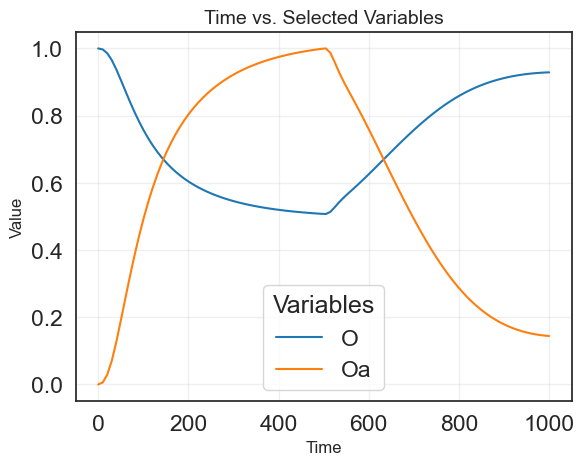

In [ ]:
# normalise data based on max value of each column
normalized_result = result.copy()
for col in columns_to_plot:
    max_value = normalized_result[col].max()
    if max_value != 0:
        normalized_result[col] = normalized_result[col] / max_value

# Assume your DataFrame is named 'df'
# Select the columns you want to plot (replace with your actual column names)
columns_to_plot = ["O", "Oa"]  # Example: R1, R2, and O against time

# Add additional lines
for col in columns_to_plot:
    sns.lineplot(
        data=normalized_result,
        x="time",
        y=col,
        label=col,  # Unique label for each line
    )

# Customize plot
# plt.xlim(500, 1000)
plt.title("Time vs. Selected Variables (Normalized)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(title="Variables")  # Show legend with column names
plt.grid(alpha=0.3)
plt.show()

### Directly load antimony

In [23]:
antimony_file = "C:/Github/new-peak-project/src/notebooks/prototyping/antimony1.txt"
antimony_model = ""
with open(antimony_file, "r") as f:
    antimony_model = f.read()
# print(f"Antimony model: \n{antimony_model}")

In [24]:
from models.Solver.RoadrunnerSolver import RoadrunnerSolver
from models.ModelBuilder import ModelBuilder

new_builder = ModelBuilder("builder")
sbml_model = new_builder.get_sbml_model_from(antimony_model)
rrs = RoadrunnerSolver()
rrs.compile(sbml_model)

In [25]:
result = rrs.simulate(0, 1000, 100)